In [63]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import matplotlib as mpl

# Script

In [58]:
ofdir = './precision_study/'
dims = [2**i for i in range(1,11)]
xlims = (-5, 5)

In [59]:
for dim in tqdm(dims):
    os.system("./exercise04 -k " + str(dim) + ' -p 0.1' + f" -x {xlims[0]},{xlims[1]}"+ " -o " + ofdir + str(dim))

100%|██████████| 10/10 [00:03<00:00,  3.21it/s]


# Study precision
For the hamiltonian hardcoded in the program we expect to have as eigenvalues $\lambda = (2n+1)$ with $n\in\mathbb{N}$. Thus we can get the relative error for each eigenvalue.

In [47]:
data = np.loadtxt(ofdir + '8192.txt')
eigenstates = data[:-1,:]
eigenvalues = data[-1,:]
x = list(range(len(eigenvalues)))
truevals = [2*i+1 for i in range(len(eigenvalues))]
error = (eigenvalues - truevals)/truevals

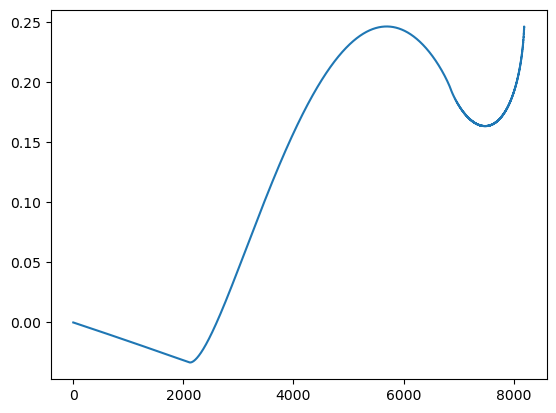

In [48]:
plt.plot(x, error)

In [61]:
tot_truevals = [i+0.5 for i in range(dims[-1])]
errors = []
eigenvalues_dim = []
eigenstates_dim = []
for dim in dims:
    data = np.loadtxt(ofdir + f'{dim}.txt')
    eigenvalues = data[-1,:]
    eigenstates = data[:-1, :]
    eigenvalues_dim.append(eigenvalues)
    eigenstates_dim.append(eigenstates)
    truevals = tot_truevals[:dim]
    error = abs(eigenvalues - truevals)/truevals
    errors.append(error)


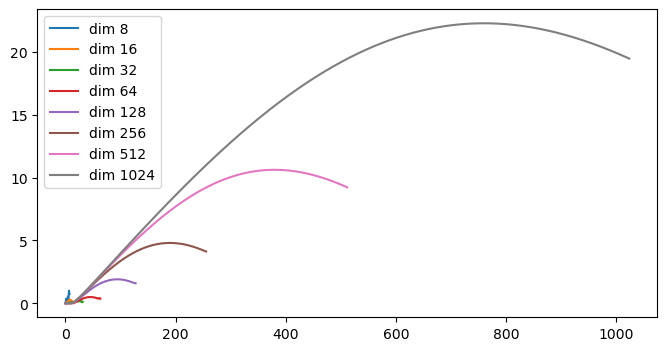

In [67]:
fig, ax = plt.subplots(figsize = (8, 4))
for i, dim in enumerate(dims[2:]):
    ax.plot(tot_truevals[:dim], errors[i+2], label=f'dim {dim}')
ax.legend()


In [9]:
print('linearity holds till relativ error:', max(errors[-1][250:500]))

linearity holds till relativ error: 590.7909252644204


array([0.00951905, 0.75240217])

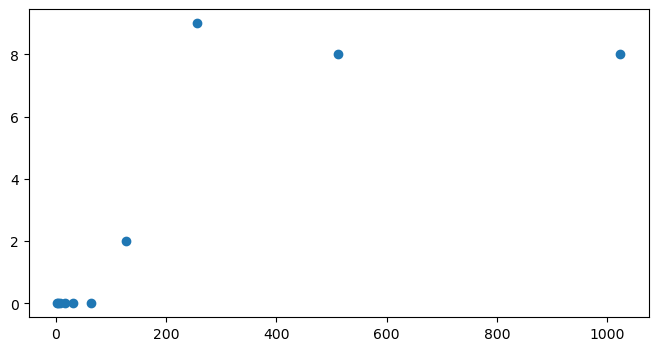

In [70]:
threshold = 0.001
neigval_belowt = [len(error[error < threshold]) for error in errors]

fig, ax = plt.subplots(figsize = (8, 4))
ax.scatter(dims, neigval_belowt)

np.polyfit(dims, neigval_belowt, deg=1)

array([-0.00151504,  0.01031264])

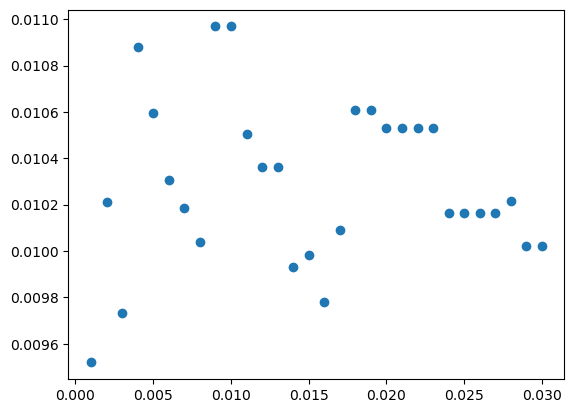

In [69]:
thresholds = [i*0.001 for i in range(1, 31)]
ang_coeffs = np.asarray([np.polyfit(dims, [len(error[error < threshold]) for error in errors], deg=1)[0] for threshold in thresholds])
plt.scatter(thresholds, ang_coeffs)

np.polyfit(thresholds, ang_coeffs, deg=1)

# Study eigenstates

/tmp/ipykernel_7633/1829915055.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


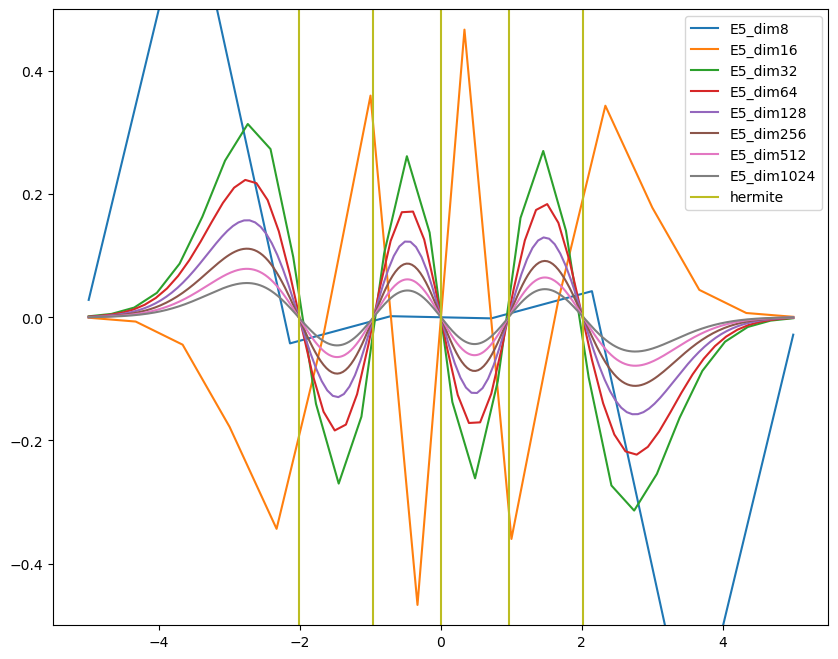

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
E_level = 5
hermite_coeffs = np.zeros(E_level+1)
hermite_coeffs[E_level] = 1
hermite = np.polynomial.hermite.Hermite(coef=hermite_coeffs, )
for i in range(np.where(np.array(dims)>E_level)[0][0], len(dims)):
    x, step = np.linspace(xlims[0], xlims[1], dims[i], retstep=True)
    ax.plot(x, eigenstates_dim[i][:, E_level], label=f'E{E_level}_dim{dims[i]}')

hermite_norm = sum((1/np.pi)**0.25*np.exp(-x**2)*hermite(x))
ax.plot(x, (1/np.pi)**0.25*np.exp(-x**2)*hermite(x)/hermite_norm, label='hermite')
#ax.plot(x, scipy.special.hermite(E_level)(x))
ax.set_ylim(-0.5, 0.5)
ax.legend()
fig.show()

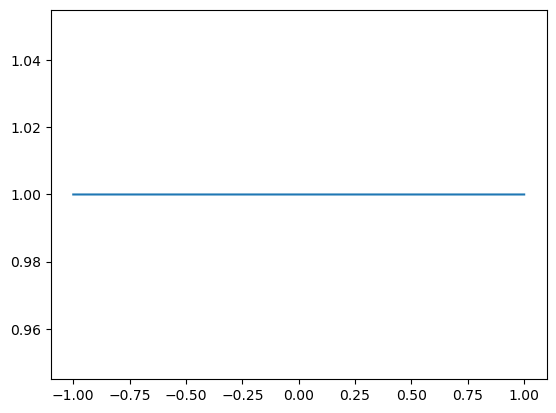

In [90]:
plt.plot(x, hermite(x))

# Check normalization

In [7]:
eigenstates_dim

array([[-0.04615487,  0.05302649,  0.70559884,  0.70511573],
       [-0.70559884,  0.70511573, -0.04615487, -0.05302649],
       [-0.70559884, -0.70511573, -0.04615487,  0.05302649],
       [-0.04615487, -0.05302649,  0.70559884, -0.70511573]])

In [57]:
eigenvalues_dim[6]

array([  0.49980919,   1.49904567,   2.49751796,   3.49522592,
         4.49217577,   5.48841621,   6.48421227,   7.48066675,
         8.48130702,   9.49469483,  10.53633984,  11.62698431,
        12.78706819,  14.03148462,  15.36819567,  16.79999908,
        18.32688446,  19.94763112,  21.66060591,  23.4640906 ,
        25.35639267,  27.33586957,  29.40092277,  31.54998362,
        33.78149888,  36.0939184 ,  38.48568531,  40.95522847,
        43.50095675,  46.12125484,  48.81448014,  51.57896057,
        54.41299303,  57.31484246,  60.28274121,  63.31488885,
        66.4094522 ,  69.56456553,  72.778331  ,  76.04881921,
        79.37406987,  82.75209254,  86.18086752,  89.65834676,
        93.1824548 ,  96.75108985, 100.36212485, 104.01340856,
       107.70276675, 111.42800335, 115.18690169, 118.97722567,
       122.79672111, 126.64311693, 130.51412649, 134.40744888,
       138.32077027, 142.25176519, 146.19809791, 150.15742378,
       154.12739059, 158.10563994, 162.0898086 , 166.07